# Dota 2 Autoencoder and clustering analyzer

# Autoencoder

### Train/Load Autoencoder

Inicializando Dota2 Autoencoder...
Carregando dataset...
Tier: ['professional'], Duração: 30-120 minutos
Patches: 7.36 (10844)
Training models...
Available permutations: 28
Permutations hash: 8a79ab390b8572cdbb26f5921dc154c1a191f7bcebe70352b72f7d2b2b1989a1
Permutation results already exist: ./tmp/8a79ab390b8572cdbb26f5921dc154c1a191f7bcebe70352b72f7d2b2b1989a1/dota_autoencoder_permutations.csv
Best permutation: 0_001_0_3_256__128__64__32_8_4_3 with loss 3e-06
Test Accuracy: 1.0, Avg MSE: 1.2195e-07, Stopped at: 60
Best permutation: 0_001_0_3_256__128__64__32_8_4_3
Permutações:
Permutação 0_001_0_3_64__32_8_4_2: Los: 2.60e-05 MSE: 8.66e-07, Stop: 54
Permutação 0_001_0_3_64__32_8_4_3: Los: 8.60e-05 MSE: 4.00e-06, Stop: 49
Permutação 0_001_0_3_64__32_8_4_4: Los: 9.90e-05 MSE: 4.00e-06, Stop: 51
Permutação 0_001_0_3_64__32_8_4_8: Los: 8.00e-05 MSE: 3.00e-06, Stop: 54
Permutação 0_001_0_3_64__32__16_8_4_2: Los: 9.90e-05 MSE: 3.00e-06, Stop: 50
Permutação 0_001_0_3_64__32__16_8_4_3: Los: 8.0

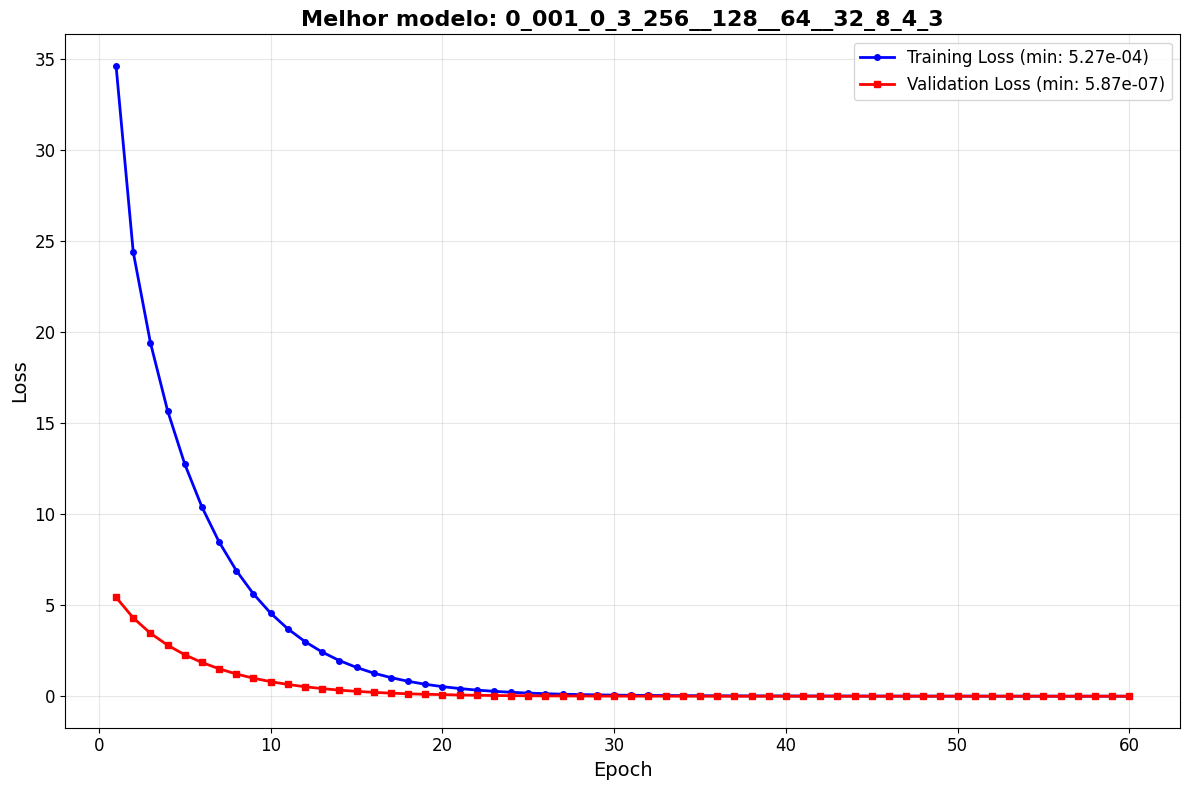

In [1]:
from dota import Dota2
from model import Dota2Autoencoder
from permutations import run_permutations
from plot import plot_loss_history
dota = Dota2([56], ['professional'], (30, 120))

print("Training models...")
train_df, val_df, test_df = dota.prepare_data_splits(dota.dataset)
df, best_permutation, loss_path, model_path, plot_path, report_path = run_permutations(
    dota, 100, train_df, val_df, test_df, "dota_autoencoder", "dota_autoencoder_loss", "dota_autoencoder_permutations")
print("Best permutation:", best_permutation)
plot_loss_history(loss_path, plot_path,
                  "Melhor modelo: " + str(best_permutation))
print("=" * 50)
print("Permutações:")
df.sort("loss")
for p in df.iter_rows(named=True):
    print(
        f"Permutação {p["permutation"]}: Los: {p["loss"]:.2e} MSE: {p["avg_mse"]:.2e}, Stop: {p["stopped"]}")